In [1]:
import pandas as pd

import hilbert

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

In [2]:
test_df = pd.read_csv('results/Japan_octect_3_time_100k_final.csv')
orig_df = pd.read_csv('data/Japan_dataset_octet_3.csv')

In [3]:
test_coords = hilbert.decode(test_df.integer.to_numpy(), num_bits=12, num_dims=2)
test_df['x'] = test_coords[:, 0]
test_df['y'] = test_coords[:, 1]

In [4]:
test_df[test_df.lbf_label == 1]

,integer,time,lbf_label,internal_label,x,y
11,13353166,186708.0,1,FT,3192,1522
30,8728231,284083.0,1,FT,2913,2114
32,10740593,288750.0,1,FT,3157,3528
33,10697692,366625.0,1,FT,3323,3493
39,11296337,237667.0,1,ST,4060,3377
...,...,...,...,...,...,...
99848,5941192,94875.0,1,ST,986,4066
99882,5941127,102625.0,1,ST,982,4069
99896,6587145,93625.0,1,ST,1165,3740
99908,10987811,90917.0,1,FT,3339,3610


In [5]:
orig_coords = hilbert.decode(orig_df[orig_df.label == 1].integer.to_numpy(), num_bits=12, num_dims=2)

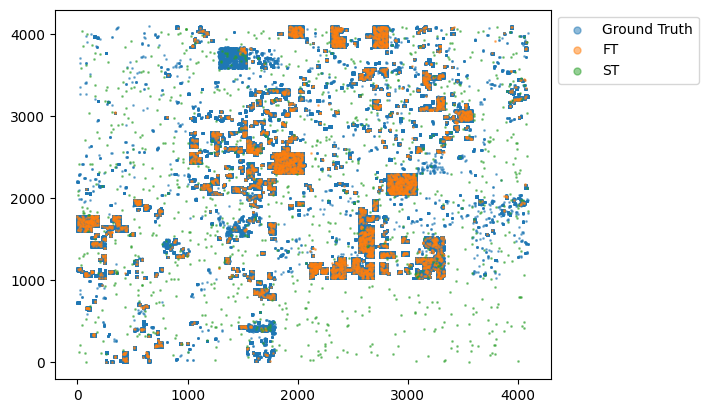

In [6]:
plt.scatter(orig_coords[:, 0], orig_coords[:, 1], s=1, label="Ground Truth", alpha=0.5)
plt.scatter(test_df[test_df.internal_label == 'FT']['x'], test_df[test_df.internal_label == 'FT']['y'], s=1, label="FT", alpha=0.5)
plt.scatter(test_df[test_df.internal_label == 'ST']['x'], test_df[test_df.internal_label == 'ST']['y'], s=1, label="ST", alpha=0.5)
plt.legend(markerscale=5, bbox_to_anchor=(1, 1))
#plt.savefig('figures/time_analysis_original_result', bbox_inches='tight')
plt.show()

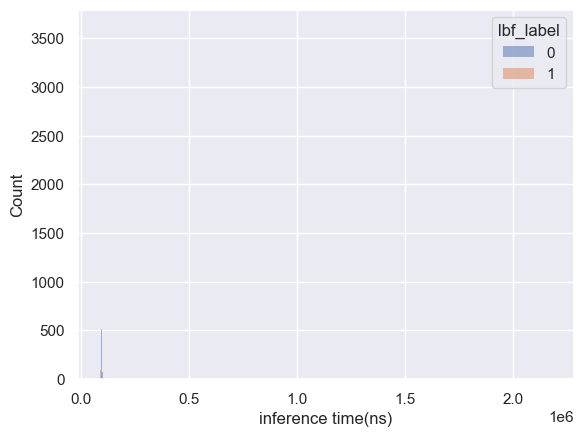

In [50]:
sns.histplot(
    data=test_df,
    x="time",
    hue='lbf_label',
    edgecolor='none',
)
#plt.legend(['Predicted Positive', 'Predicted Negative'])
plt.xlabel('inference time(ns)')
plt.savefig('time_histogram', dpi=1000)
plt.show()

In [7]:
from matplotlib import cbook
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes

In [65]:
test_df[test_df.internal_label == 'ST']

,integer,time,lbf_label,internal_label,x,y
39,11296337,237667.0,1,ST,4060,3377
257,8557950,111417.0,1,ST,2439,2553
326,9012277,99167.0,1,ST,2948,2723
502,4811250,97042.0,1,ST,1009,2669
691,15097433,97791.0,1,ST,2098,735
...,...,...,...,...,...,...
99546,16528772,94583.0,1,ST,4042,440
99819,15937029,101583.0,1,ST,3248,403
99848,5941192,94875.0,1,ST,986,4066
99882,5941127,102625.0,1,ST,982,4069


In [87]:
x = [1,1,2,3,3,5,7,8,9,10,
     10,11,11,13,13,15,16,17,18,18,
     18,19,20,21,21,23,24,24,25,25,
     25,25,26,26,26,27,27,27,27,27,
     29,30,30,31,33,34,34,34,35,36,
     36,37,37,38,38,39,40,41,41,42,
     43,44,45,45,46,47,48,48,49,50,
     51,52,53,54,55,55,56,57,58,60,
     61,63,64,65,66,68,70,71,72,74,
     75,77,81,83,84,87,89,90,90,91
     ]

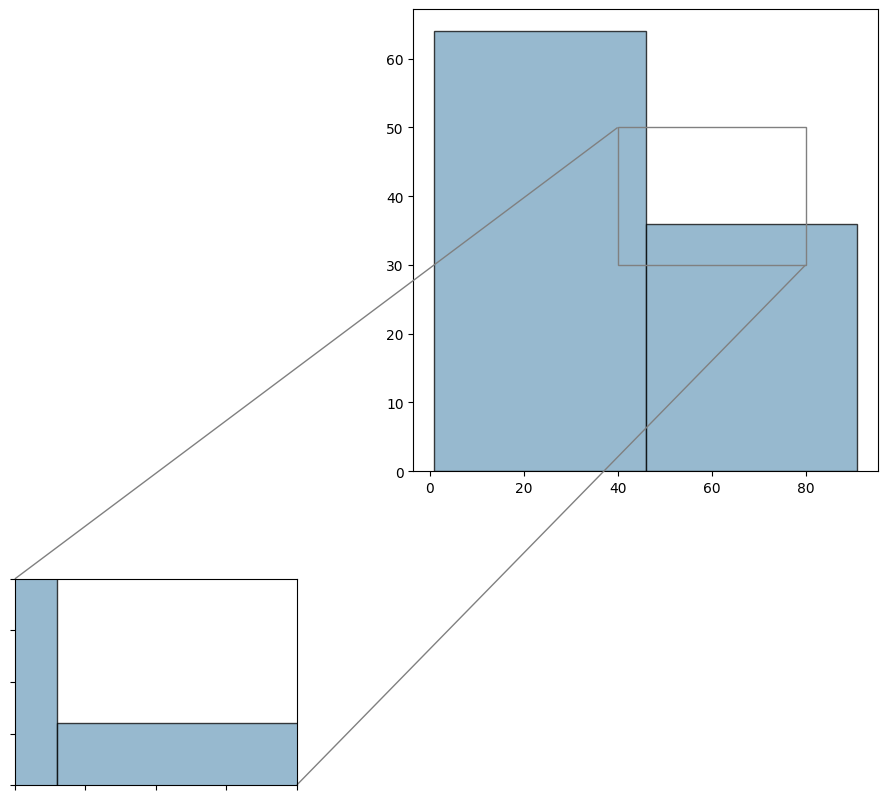

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

x = [1,1,2,3,3,5,7,8,9,10,
     10,11,11,13,13,15,16,17,18,18,
     18,19,20,21,21,23,24,24,25,25,
     25,25,26,26,26,27,27,27,27,27,
     29,30,30,31,33,34,34,34,35,36,
     36,37,37,38,38,39,40,41,41,42,
     43,44,45,45,46,47,48,48,49,50,
     51,52,53,54,55,55,56,57,58,60,
     61,63,64,65,66,68,70,71,72,74,
     75,77,81,83,84,87,89,90,90,91
     ]

fig =plt.figure(figsize=(6,6), dpi=100)
slk_plt=fig.add_subplot(111)
n, num_of_bins, patches = slk_plt.hist(x, 2, color='#75A2BF',edgecolor='black', alpha=0.75)
axins = zoomed_inset_axes(slk_plt, 1.5, loc= 'upper right', bbox_to_anchor=(0,0), borderpad=3)
n1, num_of_bins1, patches1 = axins.hist(x, 2, color='#75A2BF',edgecolor='black', alpha=0.75)
axins.set_xlim([40,80])
axins.set_ylim([30,50])
axins.yaxis.get_major_locator().set_params(nbins=4)
axins.xaxis.get_major_locator().set_params(nbins=4)
axins.tick_params(labelleft=False, labelbottom=False)

mark_inset(slk_plt, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

In [45]:
lbf_pos = test_df[test_df.lbf_label == 1].time.to_numpy()
bins = np.histogram_bin_edges(lbf_pos, bins='auto')

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x36fe2ec20>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x37c7ac850>)

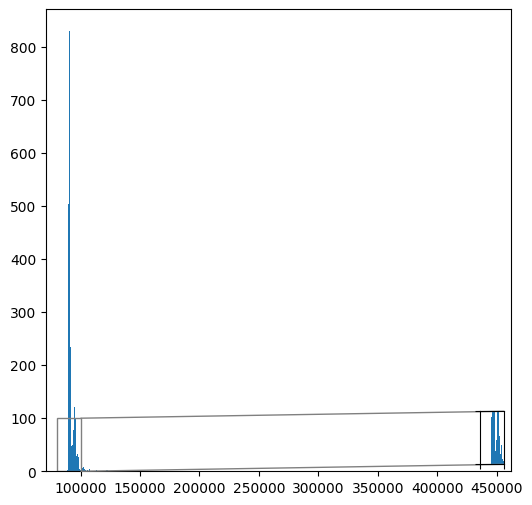

In [47]:
fig, ax = plt.subplots(figsize=[6, 6])


counts, bins, bars = ax.hist(lbf_pos, bins=bins)

#inset axes
x1, x2, y1, y2 = 80_000 , 100_000, 0, 100
#x1, x2, y1, y2 = 0, 100_000 // 2, 0, 800 // 2

axins = zoomed_inset_axes(ax, zoom=1, loc='lower right')
axins.hist(lbf_pos, bins=bins)

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
# axins.yaxis.get_major_locator().set_params(nbins=7)
# axins.xaxis.get_major_locator().set_params(nbins=7)
axins.tick_params(labelleft=False, labelbottom=False)

mark_inset(ax, axins, loc1=1, loc2=4, fc='none', ec='0.5')


In [53]:
bins = np.histogram_bin_edges(test_df.time.to_numpy(), bins='auto')
lbf_pos = test_df[test_df.lbf_label == 1].time.to_numpy()
lbf_neg = test_df[test_df.lbf_label == 0].time.to_numpy()

(array([ 3., 21., 89., ...,  0.,  0.,  1.]),
 array([ 88833.        ,  89092.45912409,  89351.91824818, ...,
        443773.08175182, 444032.54087591, 444292.        ]),
 <BarContainer object of 1370 artists>)

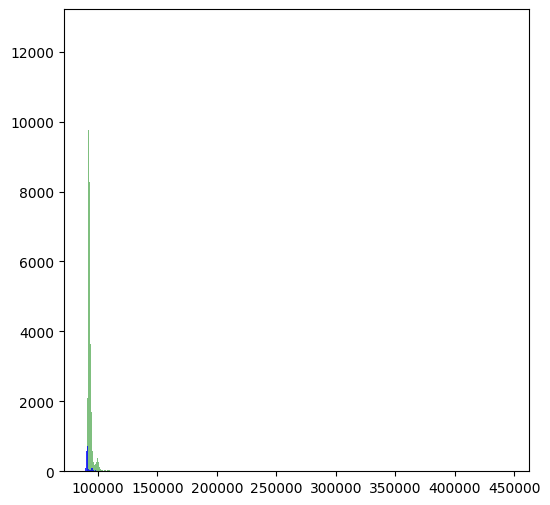

In [49]:
fig, ax = plt.subplots(figsize=[6, 6])
#ax2 = ax.twinx()

ax.hist(lbf_neg, bins=bins, alpha=0.5, label="Predicted Negative", edgecolor='none', color='green')

ax.hist(lbf_pos, bins=bins, alpha=0.8, label="Predicted Positive", edgecolor='none', color='blue')


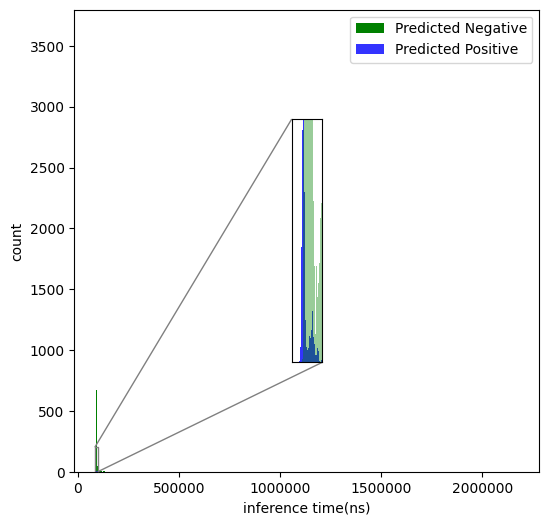

In [67]:
fig, ax = plt.subplots(figsize=[6, 6])
#ax2 = ax.twinx()

ax.hist(lbf_neg, bins=bins, alpha=1, label="Predicted Negative", edgecolor='none', color='green')

ax.hist(lbf_pos, bins=bins, alpha=0.8, label="Predicted Positive", edgecolor='none', color='blue')


ax.ticklabel_format(useOffset=False, style='plain')

ax.set_ylabel('count')
ax.set_xlabel('inference time(ns)')

ax.legend()

#inset axes
x1, x2, y1, y2 = 85_000 , 100_000, 0, 200
#x1, x2, y1, y2 = 0, 100_000 // 2, 0, 800 // 2

axins = zoomed_inset_axes(ax, zoom=10, loc='center')
axins.hist(lbf_pos, bins=bins, alpha=0.8, edgecolor='none',  color='blue')
axins.hist(lbf_neg, bins=bins, alpha=0.4, edgecolor='none', color='green')


axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
# axins.yaxis.get_major_locator().set_params(nbins=7)
# axins.xaxis.get_major_locator().set_params(nbins=7)
axins.tick_params(labelleft=False, labelbottom=False, bottom=False, top=False, left=False, right=False)

mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='0.5')


#plt.legend()
#ax.ticklabel_format(useOffset=False)


plt.savefig('test_img', dpi=1000, bbox_inches='tight')


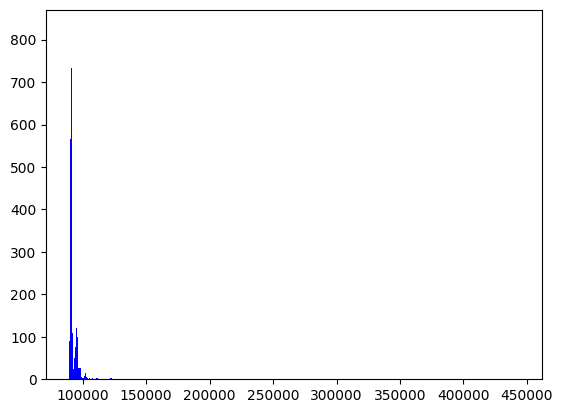

In [15]:
plt.hist(test_df[test_df.lbf_label == 1].time.to_numpy(), bins='auto', color='blue', edgecolor='none', label='Predicted Positive')
#plt.hist(test_df[test_df.lbf_label == 0].time.to_numpy(), bins=bins, color='green', edgecolor='none', label='Predicted Negative')
#plt.savefig('temp.png', dpi=1000)

In [42]:
counts.max()

1693.0

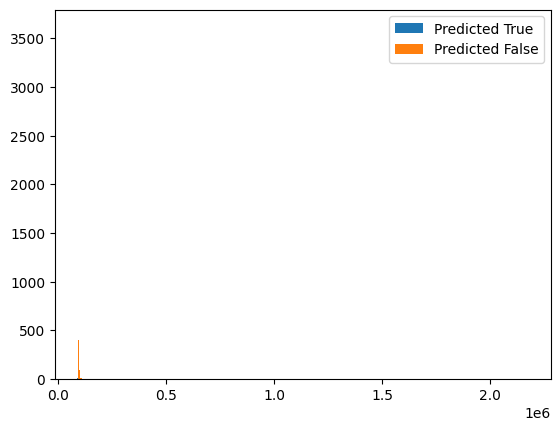

In [11]:
plt.hist(test_df[test_df.lbf_label == 1].time.to_numpy(), bins=bins, label="Predicted True", zorder=1)
plt.hist(test_df[test_df.lbf_label == 0].time.to_numpy(), bins=bins, label="Predicted False", zorder=2)
plt.legend()

In [8]:
time_threshold = test_df[test_df.lbf_label == 0].time.median()
emperical_ft = test_df[(test_df.lbf_label != 0) & (test_df.time < time_threshold)]

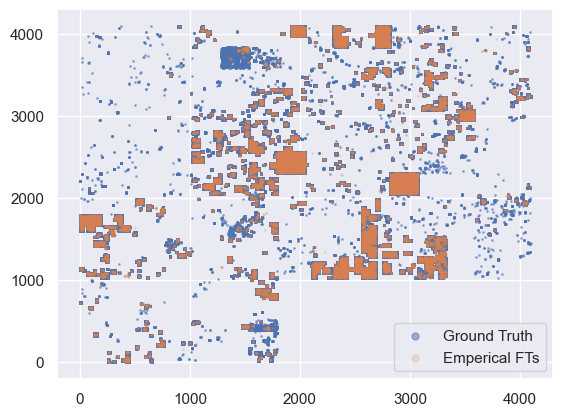

In [10]:
plt.scatter(orig_coords[:, 0], orig_coords[:, 1], s=1, alpha=0.5, label="Ground Truth")
plt.scatter(emperical_ft['x'], emperical_ft['y'], s=1, alpha=0.2, label="Emperical FTs")
plt.legend(markerscale=5)
#plt.savefig('figures/emperical_ft')
plt.show()

In [18]:
t = test_df[test_df.lbf_label == 0].time.median()

In [20]:
test_df[(test_df.internal_label == 'FT') & (test_df.time >= t)]

,integer,time,lbf_label,internal_label,x,y
6,8730788,207708.0,1,FT,2899,2065
23,13353478,186750.0,1,FT,3182,1516
29,2249851,187334.0,1,FT,1288,1509
58,8269522,187917.0,1,FT,1861,2409
111,9835587,109208.0,1,FT,2401,3848
...,...,...,...,...,...,...
498448,10695124,100667.0,1,FT,3287,3465
498729,13244087,98334.0,1,FT,3205,1250
499027,13799538,96125.0,1,FT,2681,1589
499286,10720249,96000.0,1,FT,3198,3363
